# The Quadratic Assignment Problem

In [274]:
##This is an initialization cell. Run this first
import pandas as pd
import numpy as np
from itertools import product
import time
import math
import matplotlib
import matplotlib.pyplot as plt

## Here we are creating a repository of different data sizes
We have our data from https://neos-guide.org/content/quadratic-assignment-problem and 
http://anjos.mgi.polymtl.ca/qaplib/
QAPLIB - A Quadratic Assignment Problem Library
R.E. BURKARD, E. ÇELA, S.E. KARISCH and F. RENDL

In [275]:
def CSVtoNumpyArray(rawdata):
    """
    Input: 
    rawdata = a csv file (insert name as a string)

    Output:
    two numpy matrices in a tuple
    """
    data = pd.read_csv(rawdata)  #Reads the data in as a pandas object
    c = data.columns
    column = int(c[0])
    final_data1 = data.iloc[:column,:].values  #Sets data into a series of numpy arrays of strings
    final_data2 = data.iloc[column:,:].values  #1 is for the first matrix(loc) and 2 is for the second(flow)
    

    #Forms the matrix as a numpy array (easier to work with) instead of an list of lists of strings
    def string_to_integers(final_data):
        matrix = []
        for j in range(column):
            string = final_data[j][0]
            string2 = string.split(" ")
            emptyarray = []
            for i in string2:
                if i != '':
                    emptyarray.append(int(i))
            matrix.append(emptyarray)
        npmatrix = np.array(matrix) 
        return npmatrix
    return string_to_integers(final_data1),string_to_integers(final_data2)

In [276]:
#REPOSITORY

#small sized matrices(under 10x10)
matrix_size_4 = 'tai4a.csv'
matrix_size_5 = 'tai5a.csv'
matrix_size_6 = 'tai6a.csv'
matrix_size_7 = 'tai7a.csv'
matrix_size_8 = 'tai8a.csv'
matrix_size_9 = 'tai9a.csv'

#medium sized matrices(ranging from 10x10 to 30x30)
matrix_size_10 = 'tai10a.csv'
matrix_size_11 = 'tai11a.csv'
matrix_size_12 = 'tai12a.csv'
matrix_size_15 = 'chr15a.csv' 
matrix_size_20 = 'chr20a.csv'
matrix_size_26 = 'bur26a.csv'

#large sized matrices(30x30 and bigger)
matrix_size_40 = 'tai40a.csv'
matrix_size_60 = 'tai60.csv'
matrix_size_80 = 'tai80.csv'
matrix_size_256 = 'tai256c.csv'

datamatrix = CSVtoNumpyArray(matrix_size_6) # Decide the size of problem to run in the code (clue: 
                                                #the number in the original name is the size)
MatrixLoc = datamatrix[0]
MatrixFlow = datamatrix[1]

## Preliminary functions

In [277]:
def ourpermutations(iterable, r=None):
    """
    Input:
    String or numbers separated by a space
    optional= the length that the permutations must be
    
    Output:
    a generator of permutations
    """
    
    pool = iterable.split(" ")
    n = len(pool)
    r = n if r is None else r
    for indices in product(range(n), repeat=r):
        if len(set(indices)) == r:
            yield list(pool[i] for i in indices)

In [278]:
#Demonstration of the Permutation function
"""
This is a very heavy generator - there seems to be litle to no way to make it more efficient. Even without 
printing every part of it is slow
"""
start = time.time()
r = ourpermutations('1 2 3' )# 8 9 10')
print(list(r))
#print(next(r))
#print(next(r))
#these are the time calculation
end = time.time()
thetime = end - start
print(thetime)

[['1', '2', '3'], ['1', '3', '2'], ['2', '1', '3'], ['2', '3', '1'], ['3', '1', '2'], ['3', '2', '1']]
0.00011801719665527344


In [279]:
def ExhaustiveSearchinputs(datamatrix):
    """
    Input:
    datamatrix: numpy array
    
    Output:
    list of every permutation allowed and the time it took to run(this is to help with the optimisation and 
    testing process)
    
    """
    
    # Important starting values
    start = time.time()
    length = len(datamatrix)
    thestring = ""
    
    #Generate the permutations
    for i in range(0,length):  #this is making a string of numbers from 0 to the size of the matrix -1
        thestring += str(i) + " "
    thestring = thestring[:-1]
    listofassociations = list(ourpermutations(thestring,length))  #this was the function we made earlier
    
    #these are the time calculation
    end = time.time()
    thetime = end - start
    return listofassociations, thetime,thestring
##########PLEASE NOTE THIS FUNCTION TAKES 4 seconds once datamatrix is length 8 and takes 99 seconds for 
##########length 9 so don't use values in the repository(use datamatrix size 3 for now)##############

### Time test for ExhaustiveSearchinputs

In [280]:
listofpermutations= ExhaustiveSearchinputs(MatrixLoc)[0]
time_taken_10 = ExhaustiveSearchinputs(MatrixLoc)[1]
print(time_taken_10)
listofpermutations

0.01119375228881836


[['0', '1', '2', '3', '4', '5'],
 ['0', '1', '2', '3', '5', '4'],
 ['0', '1', '2', '4', '3', '5'],
 ['0', '1', '2', '4', '5', '3'],
 ['0', '1', '2', '5', '3', '4'],
 ['0', '1', '2', '5', '4', '3'],
 ['0', '1', '3', '2', '4', '5'],
 ['0', '1', '3', '2', '5', '4'],
 ['0', '1', '3', '4', '2', '5'],
 ['0', '1', '3', '4', '5', '2'],
 ['0', '1', '3', '5', '2', '4'],
 ['0', '1', '3', '5', '4', '2'],
 ['0', '1', '4', '2', '3', '5'],
 ['0', '1', '4', '2', '5', '3'],
 ['0', '1', '4', '3', '2', '5'],
 ['0', '1', '4', '3', '5', '2'],
 ['0', '1', '4', '5', '2', '3'],
 ['0', '1', '4', '5', '3', '2'],
 ['0', '1', '5', '2', '3', '4'],
 ['0', '1', '5', '2', '4', '3'],
 ['0', '1', '5', '3', '2', '4'],
 ['0', '1', '5', '3', '4', '2'],
 ['0', '1', '5', '4', '2', '3'],
 ['0', '1', '5', '4', '3', '2'],
 ['0', '2', '1', '3', '4', '5'],
 ['0', '2', '1', '3', '5', '4'],
 ['0', '2', '1', '4', '3', '5'],
 ['0', '2', '1', '4', '5', '3'],
 ['0', '2', '1', '5', '3', '4'],
 ['0', '2', '1', '5', '4', '3'],
 ['0', '2'

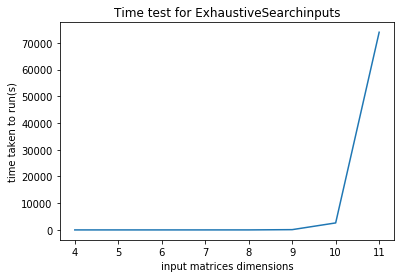

In [281]:
#plot
time_taken = [0.00034046173095703125, 0.0023462772369384766, 0.015115022659301758, 0.19432568550109863, 
              4.150153875350952, 101.804532289505, 2618.7232191562653,73961.41815924644]
length = [4,5,6,7,8,9,10,11]


fig, ax = plt.subplots()
ax.plot(length, time_taken)

ax.set(xlabel='input matrices dimensions', ylabel='time taken to run(s)',
       title='Time test for ExhaustiveSearchinputs')

fig.savefig("Time test for ExhaustiveSearchinputs.png")
plt.show()

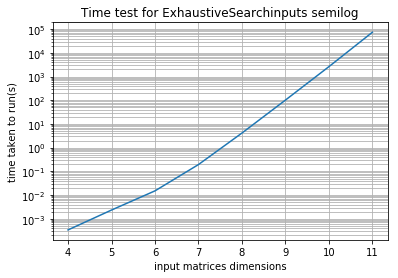

In [282]:
#semilogplot
time_taken = [0.00034046173095703125, 0.0023462772369384766, 0.015115022659301758, 0.19432568550109863, 
              4.150153875350952, 101.804532289505, 2618.7232191562653,73961.41815924644]
length = [4,5,6,7,8,9,10,11]

plt.grid(True, which="both")# Display grid

plt.semilogy(length, time_taken)
plt.xlabel('input matrices dimensions')# Give x axis label for the semilog plot
plt.ylabel('time taken to run(s)')# Give y axis label for the semilog plot

plt.title('Time test for ExhaustiveSearchinputs semilog')# Provide the title for the semilog plot
plt.savefig("Time test for ExhaustiveSearchinputs semilog.png")

plt.show()

In [283]:
print(time_taken)
print(MatrixLoc,MatrixFlow)

[0.00034046173095703125, 0.0023462772369384766, 0.015115022659301758, 0.19432568550109863, 4.150153875350952, 101.804532289505, 2618.7232191562653, 73961.41815924644]
[[ 0 40 64 36 22 60]
 [40  0 41 22 36 72]
 [64 41  0 28 44 53]
 [36 22 28  0 20 50]
 [22 36 44 20  0 41]
 [60 72 53 50 41  0]] [[0 1 1 2 0 0]
 [1 0 0 0 0 2]
 [1 0 0 0 0 1]
 [2 0 0 0 3 0]
 [0 0 0 3 0 0]
 [0 2 1 0 0 0]]


# Exhaustive search

In [288]:
def generate_optimal_permutation(listofpermutations,MatrixLocat,MatrixFlow):
    """
    Input:
    MatrixLoc
    MatrixFlow
    listofpermutaions
    
    Output:
    The optimal permutation
    the optimal cost
    in a tuple
    """
    start = time.time()
    matrix_length = len(MatrixLoc)
    no_of_permutations = len(listofpermutations)
    arraysol = []
    
    #generate the multiples (that function we are optimising)
    for j in range(no_of_permutations):
        perm = listofpermutations[j]
        total = 0
        for i in range(matrix_length):
            for k in range(i,matrix_length):
                total += MatrixLoc[i][k]*MatrixFlow[int(perm[i])][int(perm[k])]#this is that function that 
                                                #adds the products of different combinations of factories
        arraysol.append(total)
    
    finalcost = min(arraysol)
    finalindex = np.argmin(arraysol) #finds the optimal set of locations to factories(Which I stupidly 
                                        #called flow)
    end = time.time()
    thetime = end - start    
    return listofpermutations[finalindex],finalcost,thetime

In [289]:
#generate_optimal_permutation(listofpermutations,MatrixLoc,MatrixFlow)

### Time test for generate_optimal_permutation

In [290]:
solutionex = generate_optimal_permutation(listofpermutations,MatrixLoc,MatrixFlow)
print(solutionex)

(['4', '1', '5', '0', '3', '2'], 313, 0.035111188888549805)


In [287]:
time_taken_Ex = [0.0004937648773193359, 0.002483844757080078, 0.020618915557861328, 0.0518794059753418, 
                 0.30233120918273926, 2.8140180110931396, 31.34966278076172]

print(time_taken_Ex)

[0.0004937648773193359, 0.002483844757080078, 0.020618915557861328, 0.0518794059753418, 0.30233120918273926, 2.8140180110931396, 31.34966278076172]


# Branch and bound

In [269]:
def generate_optimal_permutationBnB(listofpermutations,MatrixLocat,MatrixFlow):
    """
    Input:
    MatrixLoc
    MatrixFlow
    listofpermutaions
    
    Output:
    The optimal permutation
    the optimal cost
    in a tuple
    """
    start = time.time()
    matrix_length = len(MatrixLoc)
    no_of_permutations = len(listofpermutations)
    arraysol = []
    bettersol = math.inf
    bettersolind = 0
    
    #generate the multiples (that function we are optimising)
    for k in range(no_of_permutations):
        perm = listofpermutations[k]
        total = 0
        i =0
        while bettersol>=total and i <= matrix_length:
            j = i
            while j<matrix_length:
                total += MatrixLoc[i][j]*MatrixFlow[int(perm[i])][int(perm[j])]
                j += 1
            i += 1
        if bettersol>total:
            bettersol = total
            bettersolind = k
        
    
    finalcost = bettersol
    finalindex = bettersolind
    end = time.time()
    thetime = end - start
    
    return listofpermutations[finalindex],finalcost,thetime

In [270]:
#generate_optimal_permutationBnB(listofpermutations,MatrixLoc,MatrixFlow)

### Time test for generate_optimal_permutationBnB

In [271]:
solutionBnB = generate_optimal_permutationBnB(listofpermutations,MatrixLoc,MatrixFlow)
print(solutionBnB)

(['1', '0', '5', '3', '4', '2'], 474, 0.011839866638183594)


In [272]:
time_taken_BnB = [0.0003864765167236328, 0.0010573863983154297, 0.008874177932739258, 0.034032344818115234, 
                  0.1289994716644287, 1.0707018375396729, 6.384488821029663]
print(time_taken_BnB)


[0.0003864765167236328, 0.0010573863983154297, 0.008874177932739258, 0.034032344818115234, 0.1289994716644287, 1.0707018375396729, 6.384488821029663]


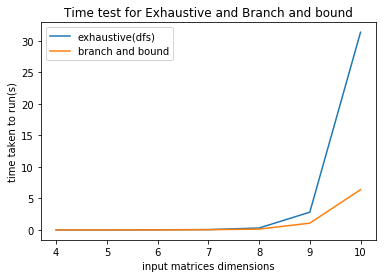

In [273]:
#plot
length = [4,5,6,7,8,9,10]

fig, ax = plt.subplots()
ax.plot(length, time_taken_Ex,label= "exhaustive(dfs)")
ax.plot(length, time_taken_BnB, label= "branch and bound")

ax.set(xlabel='input matrices dimensions', ylabel='time taken to run(s)',
       title='Time test for Exhaustive and Branch and bound')
ax.legend()
fig.savefig("Time test for Exhaustive and Branch and bound.png")
plt.show()

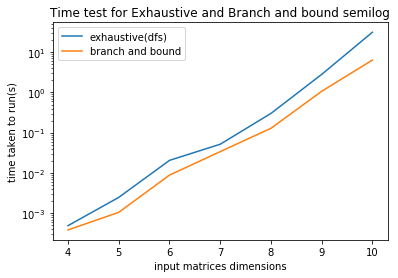

In [206]:
#semilogplot
length = [4,5,6,7,8,9,10]

plt.semilogy(length, time_taken_Ex,label= "exhaustive(dfs)")
plt.semilogy(length,time_taken_BnB,label= "branch and bound")

plt.xlabel('input matrices dimensions')# Give x axis label for the semilog plot
plt.ylabel('time taken to run(s)')# Give y axis label for the semilog plot

plt.title('Time test for Exhaustive and Branch and bound semilog')# Provide the title for the semilog plot
plt.legend()
plt.savefig("Time test for Exhaustive and Branch and bound semilog.png")

plt.show()

In [190]:
#storing permutation matrices
def NumpyArraytoCSV(permutations):
    import csv
    csvData = permutations

    with open('perm.csv', 'w') as csvFile:
        writer = csv.writer(csvFile)
        writer.writerows(csvData)

    csvFile.close()
    return True

In [191]:
NumpyArraytoCSV(listofpermutations)

True

In [192]:
permgen = ourpermutations("1 2 3")
print(list(ourpermutations("1 2 3")))

[['1', '2', '3'], ['1', '3', '2'], ['2', '1', '3'], ['2', '3', '1'], ['3', '1', '2'], ['3', '2', '1']]
